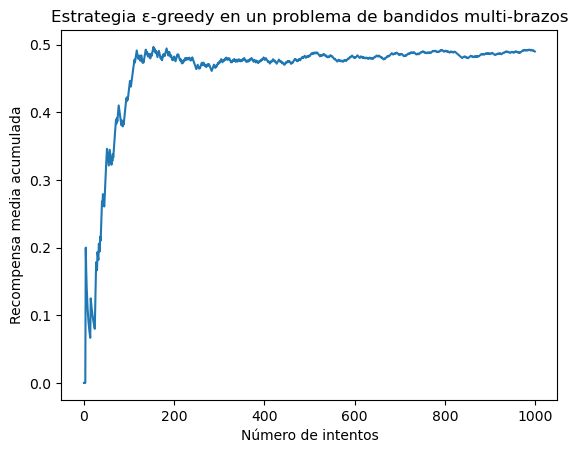

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las tasas de éxito de cada anuncio (probabilidad de clic)
conversion_rates = [0.1, 0.3, 0.5]  # Anuncios A1, A2, A3
num_arms = len(conversion_rates)
num_trials = 1000  # Número de intentos
epsilon = 0.1  # Probabilidad de exploración

# Inicializamos las estimaciones de recompensa
Q_values = np.zeros(num_arms)  
action_counts = np.zeros(num_arms)  

# Historial de recompensas
reward_history = []

for t in range(num_trials):
    # Selección de acción (Exploración vs. Explotación)
    if np.random.rand() < epsilon:
        action = np.random.randint(num_arms)  # Exploramos una opción aleatoria
    else:
        action = np.argmax(Q_values)  # Explotamos la mejor opción actual

    # Generamos la recompensa (1 con probabilidad de éxito, 0 en caso contrario)
    reward = np.random.rand() < conversion_rates[action]
    
    # Actualizamos las estadísticas
    action_counts[action] += 1
    Q_values[action] += (reward - Q_values[action]) / action_counts[action]
    reward_history.append(reward)

# Visualizamos resultados
plt.plot(np.cumsum(reward_history) / (np.arange(num_trials) + 1))
plt.xlabel("Número de intentos")
plt.ylabel("Recompensa media acumulada")
plt.title("Estrategia ε-greedy en un problema de bandidos multi-brazos")
plt.show()